## PART 1

In [4]:
!pip install mlflow scikit-learn pandas matplotlib

   ---------------------------------------- 0.0/29.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/29.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/29.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/29.0 MB ? eta -:--:--
   - -------------------------------------- 0.8/29.0 MB 1.2 MB/s eta 0:00:24
   - -------------------------------------- 1.0/29.0 MB 1.2 MB/s eta 0:00:24
   - -------------------------------------- 1.3/29.0 MB 1.2 MB/s eta 0:00:24
   -- ------------------------------------- 1.6/29.0 MB 1.2 MB/s eta 0:00:24
   -- ------------------------------------- 1.8/29.0 MB 1.2 MB/s eta 0:00:23
   -- ------------------------------------- 1.8/29.0 MB 1.2 MB/s eta 0:00:23
   -- ------------------------------------- 2.1/29.0 MB 1.2 MB/s eta 0:00:23
   --- ------------------------------------ 2.4/29.0 MB 1.2 MB/s eta 0:00:23
   --- ------------------------------------ 2.6/29.0 MB 1.2 MB/s eta 0:00:23
   --- --------------------

  ERROR: Failed to restore c:\users\ahmed mohamed\anaconda3\lib\site-packages\__pycache__\typing_extensions.cpython-312.pyc
  ERROR: Failed to restore c:\users\ahmed mohamed\anaconda3\lib\site-packages\typing_extensions-4.11.0.dist-info\
  ERROR: Failed to restore c:\users\ahmed mohamed\anaconda3\lib\site-packages\typing_extensions.py
ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Ahmed Mohamed\\anaconda3\\Lib\\site-packages\\typing_extensions.py'
Consider using the `--user` option or check the permissions.



  Using cached mlflow-2.22.0-py3-none-any.whl.metadata (30 kB)
  Using cached mlflow_skinny-2.22.0-py3-none-any.whl.metadata (31 kB)
  Using cached alembic-1.15.2-py3-none-any.whl.metadata (7.3 kB)
  Using cached docker-7.1.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached graphene-3.4.3-py2.py3-none-any.whl.metadata (6.9 kB)
  Using cached waitress-3.0.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached databricks_sdk-0.52.0-py3-none-any.whl.metadata (39 kB)
  Using cached fastapi-0.115.12-py3-none-any.whl.metadata (27 kB)
  Using cached opentelemetry_api-1.32.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached opentelemetry_sdk-1.32.1-py3-none-any.whl.metadata (1.6 kB)
  Using cached sqlparse-0.5.3-py3-none-any.whl.metadata (3.9 kB)
  Using cached uvicorn-0.34.2-py3-none-any.whl.metadata (6.5 kB)
  Using cached mako-1.3.10-py3-none-any.whl.metadata (2.9 kB)
  Using cached typing_extensions-4.13.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached graphql_core-3.2.6-py3-none-any.whl.

In [5]:
import mlflow
print(mlflow.__version__)  

2.22.0


2025/05/09 13:31:11 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\AHMEDM~1\AppData\Local\Temp\tmpz92k8o8v\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.5.1', 'cloudpickle==3.0.0']. Set logging level to DEBUG to see the full traceback. 
2025/05/09 13:31:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Pipeline executed successfully! Run 'mlflow ui' to view results.


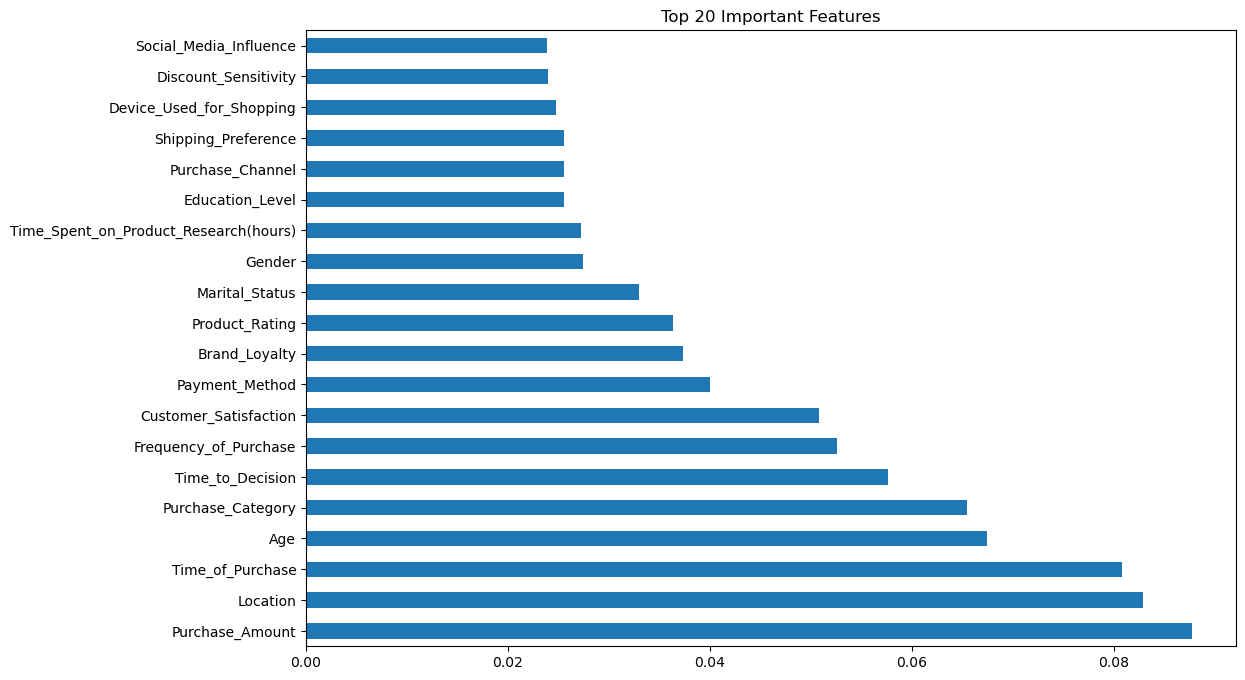

In [12]:
import mlflow
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("Deep_clean.csv")

# ===== CONFIGURATION =====
TARGET_COLUMN = "Purchase_Intent"  # Confirm this is your target
ID_COLUMN = "Customer_ID"  # Column to exclude
EXPERIMENT_NAME = "Customer_Purchase_Prediction"

# Data Preparation
def preprocess_data(df):
    # Drop ID column (not useful for modeling)
    df = df.drop(ID_COLUMN, axis=1)
    
    # Convert categorical columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if col != TARGET_COLUMN:  # Don't encode target yet
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
    return df

data_clean = preprocess_data(data.copy())

# Prepare features and target
X = data_clean.drop(TARGET_COLUMN, axis=1)
y = data_clean[TARGET_COLUMN]

# If target is categorical, encode it
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MLflow setup
mlflow.set_experiment(EXPERIMENT_NAME)

with mlflow.start_run():
    # Model training
    model = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Log parameters
    mlflow.log_params({
        "n_estimators": 150,
        "max_depth": 10,
        "features": X.shape[1],
        "target": TARGET_COLUMN
    })
    
    # Log metrics
    mlflow.log_metrics({
        "accuracy": accuracy_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred, average="weighted")
    })
    
    # Log model
    mlflow.sklearn.log_model(model, "model")
    
    # Log feature importance
    plt.figure(figsize=(12, 8))
    pd.Series(model.feature_importances_, index=X.columns).nlargest(20).plot(kind='barh')
    plt.title("Top 20 Important Features")
    plt.savefig("feature_importance.png")
    mlflow.log_artifact("feature_importance.png")
    
print("Pipeline executed successfully! Run 'mlflow ui' to view results.")

## PART 2

Logging Parameters

In [16]:
mlflow.log_param("n_estimators", 100)
mlflow.log_param("max_depth", 5)
mlflow.log_param("model_type", "RandomForest")


'RandomForest'

Logging Metrics

In [25]:
y_test = y_test.astype(str)
y_pred = y_pred.astype(str)

f1 = f1_score(y_test, y_pred, average='macro')
mlflow.log_metric("f1_score", f1)



In [26]:
mlflow.log_metric("f1_score", f1_score(y_test, y_pred, average="macro"))


In [28]:
mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))
mlflow.log_metric("f1_score", f1_score(y_test, y_pred, average='macro'))



Logging Artifacts

In [19]:
mlflow.sklearn.log_model(model, "model")


2025/05/09 14:25:53 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\AHMEDM~1\AppData\Local\Temp\tmpg_to278w\model\model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.5.1', 'cloudpickle==3.0.0']. Set logging level to DEBUG to see the full traceback. 
2025/05/09 14:25:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [21]:
import pandas as pd

preds = pd.DataFrame({"y_true": y_test, "y_pred": y_pred})
preds.to_csv("predictions.csv", index=False)
mlflow.log_artifact("predictions.csv")

